In [ ]:
%pip install torch
%pip install torch-geometric
%pip install pandas scikit-learn


In [133]:
"""import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from torch.utils.data import DataLoader, Dataset

# Example edge list (source, target)
#edge_list = [(0,1),(1,2),(1,5),(2,3),(2,6),(5,6),(4,5),(3,4)]

# Create edge_index tensor (positive edge)
edge_index_1 = [[0,1,0,3,1,3,1,2,1,4,2,4,2,6,3,5,3,6,4,5,5,6],
              [1,0,3,0,3,1,2,1,4,1,4,2,6,2,5,3,6,3,5,4,6,5]]
positive_edge_index = torch.tensor(edge_index_1, dtype = torch.long)

# Reading and Normalizing Features of steady state data 
csv_file_path = 'C:\\Users\\91950\\OneDrive\\Desktop\\steady_data.csv'
columns_to_read = [4, 7, 13, 10, 19, 16, 22]
features = pd.read_csv(csv_file_path, usecols=columns_to_read)

features = features.iloc[0:100000].values  # Use the first 20000 instances
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)
features1_steady = torch.tensor(features_normalized, dtype=torch.float)  # Use your actual features

#readying fault data
csv_file_path_1 = 'C:\\Users\\91950\\OneDrive\\Desktop\\fault_data.csv'
columns_to_read = [4, 7, 13, 10, 19, 16, 22]
features_fault = pd.read_csv(csv_file_path_1, usecols=columns_to_read)

features_fault = features_fault.iloc[0:26600].values  # Use the first 20000 instances
scaler = MinMaxScaler()
features_normalized_fault = scaler.fit_transform(features_fault)
features1_fault = torch.tensor(features_normalized_fault, dtype=torch.float)

#concatenating fault and steady features
features_steady_fault = torch.cat((features1_fault,features1_steady),dim = 0)

class GraphDataset(Dataset):
    def __init__(self, features):
         self.features = torch.tensor(features, dtype=torch.float)

    def __len__(self):
        return self.features.size(0)

    def __getitem__(self, idx):
        return self.features[idx]

features_tensor = features_steady_fault
dataset = GraphDataset(features_tensor)
dataloader = DataLoader(dataset, batch_size=100, shuffle=False)

# Transpose the feature matrix to have nodes as rows and instances as columns
#features1 = features1.T

#num_nodes = features1.size(1)  # Number of nodes
#num_features = features1.size(0)  # Number of features (instances)

data = Data(
    x=features_steady_fault,
    edge_index=positive_edge_index
)

class VariationalGCNEncoder(torch.nn.Module):
    def __init__(self, in_channels, out_channels, dropout_rate=0.5):
        super(VariationalGCNEncoder, self).__init__()
        self.conv1 = GCNConv(in_channels, 2 * out_channels, cached=True)
        self.conv_mu = GCNConv(2 * out_channels, out_channels, cached=True)
        self.conv_logstd = GCNConv(2 * out_channels, out_channels, cached=True)
        self.dropout = torch.nn.Dropout(p=dropout_rate)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = self.dropout(x)  # Apply dropout after the first convolution layer
        return self.conv_mu(x, edge_index), self.conv_logstd(x, edge_index)

class NodeFeatureDecoder(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(NodeFeatureDecoder, self).__init__()
        self.lin1 = Linear(in_channels, 2 * out_channels)
        self.lin2 = Linear(2 * out_channels, out_channels)

    def forward(self, z):
        z = F.relu(self.lin1(z))
        return self.lin2(z)

class VGAEWithNodeFeatureReconstruction(torch.nn.Module):
    def __init__(self, encoder, decoder):
        super(VGAEWithNodeFeatureReconstruction, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def encode(self, x, edge_index):
        return self.encoder(x, edge_index)

    def reparameterize(self, mu, logstd):
        if self.training:
            std = torch.exp(0.5 * logstd)
            eps = torch.randn_like(std)
            return eps.mul(std).add_(mu)
        else:
            return mu

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x, edge_index):
        mu, logstd = self.encode(x, edge_index)
        z = self.reparameterize(mu, logstd)
        recon_x = self.decode(z)
        return recon_x, mu, logstd

# Define model
encoder = VariationalGCNEncoder(7, 16, dropout_rate=0.4)
decoder = NodeFeatureDecoder(16, 7)
model = VGAEWithNodeFeatureReconstruction(encoder, decoder)

# Define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)"""

##this model initialization had gcn in encoder and linear in decoder


C:\Users\91950\AppData\Local\Temp\ipykernel_5716\3242079543.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.features = torch.tensor(features, dtype=torch.float)


In [79]:
# this model has gcn in both encoder and decoder 
import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from torch.utils.data import DataLoader, Dataset

# Example edge list (source, target)
edge_index_1 = [[0,1,0,3,1,3,1,2,1,4,2,4,2,6,3,5,3,6,4,5,5,6],
              [1,0,3,0,3,1,2,1,4,1,4,2,6,2,5,3,6,3,5,4,6,5]]
positive_edge_index = torch.tensor(edge_index_1, dtype=torch.long)

# Reading and Normalizing Features of steady state data 
csv_file_path = 'C:\\Users\\91950\\OneDrive\\Desktop\\steady_data.csv'
columns_to_read = [4, 7, 13, 10, 19, 16, 22]
features = pd.read_csv(csv_file_path, usecols=columns_to_read)

features = features.iloc[0:30000].values  # Use the first 100000 instances
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)
features1_steady = torch.tensor(features_normalized, dtype=torch.float) 

# Reading and Normalizing Fault Data
#csv_file_path_1 = 'C:\\Users\\91950\\OneDrive\\Desktop\\fault_data.csv'
#features_fault = pd.read_csv(csv_file_path_1, usecols=columns_to_read)

#features_fault = features_fault.iloc[0:26600].values 
#scaler = MinMaxScaler()
#features_normalized_fault = scaler.fit_transform(features_fault)
#features1_fault = torch.tensor(features_normalized_fault, dtype=torch.float)

# Concatenating fault and steady features
#features_steady_fault = torch.cat((features1_fault,features1_steady),dim = 0)

#USING STEADY DATA ONLY 
features_steady_fault = features1_steady
class GraphDataset(Dataset):
    def __init__(self, features):
        self.features = torch.tensor(features, dtype=torch.float)

    def __len__(self):
        return self.features.size(0)

    def __getitem__(self, idx):
        return self.features[idx]

features_tensor = features_steady_fault
dataset = GraphDataset(features_tensor)
dataloader = DataLoader(dataset, batch_size=100, shuffle=False)

data = Data(
    x=features_steady_fault,
    edge_index=positive_edge_index
)

class VariationalGCNEncoder(torch.nn.Module):
    def __init__(self, in_channels, out_channels, dropout_rate=0.5):
        super(VariationalGCNEncoder, self).__init__()
        self.conv1 = GCNConv(in_channels, 2 * out_channels, cached=True)
        self.conv_mu = GCNConv(2 * out_channels, out_channels, cached=True)
        self.conv_logstd = GCNConv(2 * out_channels, out_channels, cached=True)
        self.dropout = torch.nn.Dropout(p=dropout_rate)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = self.dropout(x) 
        return self.conv_mu(x, edge_index), self.conv_logstd(x, edge_index)

class NodeFeatureDecoder(torch.nn.Module):
    def __init__(self, in_channels, out_channels, dropout_rate=0.5):
        super(NodeFeatureDecoder, self).__init__()
        self.conv1 = GCNConv(in_channels, 2 * out_channels, cached=True)
        self.conv2 = GCNConv(2 * out_channels, out_channels, cached=True)
        self.dropout = torch.nn.Dropout(p=dropout_rate)

    def forward(self, z, edge_index):
        z = F.relu(self.conv1(z, edge_index))
        z = self.dropout(z)  
        return self.conv2(z, edge_index)

class VGAEWithNodeFeatureReconstruction(torch.nn.Module):
    def __init__(self, encoder, decoder):
        super(VGAEWithNodeFeatureReconstruction, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def encode(self, x, edge_index):
        return self.encoder(x, edge_index)

    def reparameterize(self, mu, logstd):
        if self.training:
            std = torch.exp(0.5 * logstd)
            eps = torch.randn_like(std)
            return eps.mul(std).add_(mu)
        else:
            return mu

    def decode(self, z, edge_index):
        return self.decoder(z, edge_index)

    def forward(self, x, edge_index):
        mu, logstd = self.encode(x, edge_index)
        z = self.reparameterize(mu, logstd)
        recon_x = self.decode(z, edge_index)
        return recon_x, mu, logstd

# Define model
encoder = VariationalGCNEncoder(7, 16, dropout_rate=0.2)
decoder = NodeFeatureDecoder(16, 7, dropout_rate=0.2)
model = VGAEWithNodeFeatureReconstruction(encoder, decoder)

# Define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


C:\Users\91950\AppData\Local\Temp\ipykernel_2160\1381510557.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.features = torch.tensor(features, dtype=torch.float)


In [16]:
print(positive_edge_index)
print()

tensor([[0, 1, 0, 3, 1, 3, 1, 2, 1, 4, 2, 4, 2, 6, 3, 5, 3, 6, 4, 5, 5, 6],
        [1, 0, 3, 0, 3, 1, 2, 1, 4, 1, 4, 2, 6, 2, 5, 3, 6, 3, 5, 4, 6, 5]])



In [ ]:
"""# Training loop with batching
epochs = 6000
model.train()
for epoch in range(1, epochs + 1):
    for batch_idx,batch in enumerate(dataloader):
        optimizer.zero_grad()
        data = Data(x=batch, edge_index=positive_edge_index)
        recon_x, mu, logstd = model(data.x, data.edge_index)
        recon_loss = F.mse_loss(recon_x, data.x)
        kl_loss = -0.5 * torch.mean(1 + logstd - mu.pow(2) - logstd.exp())
        loss = recon_loss + kl_loss 
        loss.backward()
        optimizer.step()

    if epoch % 50 == 0 :

            print(f'Data being trained (first 5 rows):\n{data.x[:5]}')
            print(f'Reconstructed data (first 5 rows):\n{recon_x[:5]}')
            print(f'Epoch: {epoch:03d}, Recon Loss: {recon_loss.item():.4f}, KL Loss: {kl_loss.item():.4f}, Total Loss: {loss.item():.4f}')
        """

In [80]:
# Training loop with batching
epochs = 100
model.train()
for epoch in range(1, epochs + 1):
    for batch_idx, batch in enumerate(dataloader):
        optimizer.zero_grad()
        data = Data(x=batch, edge_index=positive_edge_index)
        recon_x, mu, logstd = model(data.x, data.edge_index)
        recon_loss = F.mse_loss(recon_x, data.x)
        kl_loss = -0.5 * torch.mean(1 + logstd - mu.pow(2) - logstd.exp())
        loss = recon_loss + kl_loss 
        loss.backward()
        optimizer.step()

        # Print batch details
        print(f'Epoch: {epoch:03d}, Batch: {batch_idx:03d}, Loss: {loss.item():.4f}')

    if epoch % 50 == 0:
        print(f'Data being trained (first 5 rows):\n{data.x[:5]}')
        print(f'Reconstructed data (first 5 rows):\n{recon_x[:5]}')
        print(f'Epoch: {epoch:03d}, Recon Loss: {recon_loss.item():.4f}, KL Loss: {kl_loss.item():.4f}, Total Loss: {loss.item():.4f}')


Epoch: 001, Batch: 000, Loss: 0.9640
Epoch: 001, Batch: 001, Loss: 1.1060
Epoch: 001, Batch: 002, Loss: 1.0564
Epoch: 001, Batch: 003, Loss: 1.0195
Epoch: 001, Batch: 004, Loss: 1.0570
Epoch: 001, Batch: 005, Loss: 1.0376
Epoch: 001, Batch: 006, Loss: 0.9936
Epoch: 001, Batch: 007, Loss: 0.9806
Epoch: 001, Batch: 008, Loss: 1.0211
Epoch: 001, Batch: 009, Loss: 0.9531
Epoch: 001, Batch: 010, Loss: 0.9183
Epoch: 001, Batch: 011, Loss: 0.9025
Epoch: 001, Batch: 012, Loss: 0.9080
Epoch: 001, Batch: 013, Loss: 0.8732
Epoch: 001, Batch: 014, Loss: 0.8621
Epoch: 001, Batch: 015, Loss: 0.7655
Epoch: 001, Batch: 016, Loss: 0.7868
Epoch: 001, Batch: 017, Loss: 0.6713
Epoch: 001, Batch: 018, Loss: 0.7911
Epoch: 001, Batch: 019, Loss: 0.7109
Epoch: 001, Batch: 020, Loss: 0.7374
Epoch: 001, Batch: 021, Loss: 0.6664
Epoch: 001, Batch: 022, Loss: 0.7516
Epoch: 001, Batch: 023, Loss: 0.7212
Epoch: 001, Batch: 024, Loss: 0.7202
Epoch: 001, Batch: 025, Loss: 0.6724
Epoch: 001, Batch: 026, Loss: 0.6056
E

In [ ]:
"""# Training loop with batching and data visualization
epochs = 2000
model.train()
for epoch in range(1, epochs + 1):
    for batch_idx, batch in enumerate(dataloader):
        optimizer.zero_grad()
        data = Data(x=batch, edge_index=positive_edge_index)
        recon_x, mu, logstd = model(data.x, data.edge_index)
        recon_loss = F.mse_loss(recon_x, data.x)
        kl_loss = -0.5 * torch.mean(1 + logstd - mu.pow(2) - logstd.exp())
        loss = recon_loss + kl_loss
        loss.backward()
        optimizer.step()

        # Print a small subset of the data being trained
        if epoch % 50 == 0 and batch_idx == 0:  # Print for the first batch of every 50th epoch
            print(f'Epoch: {epoch:03d}, Batch: {batch_idx:03d}')
            print(f'Data being trained (first 5 rows):\n{data.x[:5]}')
            print(f'Reconstructed data (first 5 rows):\n{recon_x[:5]}')

    if epoch % 50 == 0:
        print(f'Epoch: {epoch:03d}, Recon Loss: {recon_loss.item():.4f}, KL Loss: {kl_loss.item():.4f}, Total Loss: {loss.item():.4f}') """


In [ ]:
print(batch)

In [81]:
#reconsruction errors on steady state data 
#Reading and Normalizing Features
csv_file_path = 'C:\\Users\\91950\\OneDrive\\Desktop\\steady_data.csv'
columns_to_read = [4, 7, 13, 10, 19, 16, 22]
features = pd.read_csv(csv_file_path, usecols=columns_to_read)
features = features.iloc[0:50000].values

scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)
features1 = torch.tensor(features_normalized, dtype=torch.float)  # Use your actual features
#features1 = torch.tensor(features,dtype=torch.float)

x_test = features1
x_test = torch.tensor(x_test, dtype=torch.float)
edge_index = positive_edge_index

#features_tensor = features1
#dataset = GraphDataset(features_tensor)
#dataloader = DataLoader(dataset, batch_size=1000, shuffle=True)

C:\Users\91950\AppData\Local\Temp\ipykernel_2160\3081124408.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test = torch.tensor(x_test, dtype=torch.float)


Mean Squared Error (MSE) per node feature:
Node 1: 0.07880368828773499
Node 2: 0.06500180810689926
Node 3: 0.08029414713382721
Node 4: 0.008549311198294163
Node 5: 0.08602871000766754
Node 6: 0.08565018326044083
Node 7: 0.07220366597175598


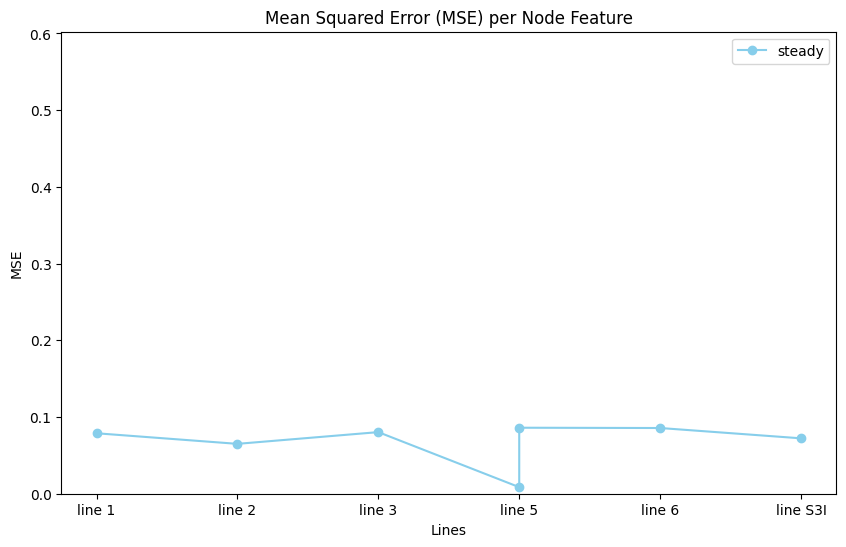

In [82]:
#calculating recons errors with steady state data 
import torch
import torch.nn.functional as F

# Assuming model is your VGAE model and data is your Data object containing features
model.eval()
with torch.no_grad():
    recon_features, _, _ = model(x_test, edge_index)

# Compute MSE for each node feature
mse_per_feature = F.mse_loss(recon_features, x_test, reduction='none')
mse_per_node = torch.mean(mse_per_feature, dim=0)
print(f'Mean Squared Error (MSE) per node feature:')
for i, mse in enumerate(mse_per_node, start=1):
    print(f'Node {i}: {mse.item()}')


#plotting
import matplotlib.pyplot as plt
import numpy as np

# MSE values for each node
#mse_values = [0.10052483528852463, 0.08730024099349976, 0.054440926760435104, 
 #          0.1400376558303833, 0.2684721052646637, 0.10724300146102905,0.07387945801019669]
mse_values = mse_per_node
steady_values = mse_values
#steady_values = [0.06045403331518173,0.04978080838918686,0.06117333471775055,0.03375500440597534,0.06546468287706375,0.06247369199991226,0.05447768419981003]

# Node labels
nodes = ['line 1', 'line 2', 'line 3', 'line 5', 'line 5', 'line 6', 'line S3I']

# Calculate the mean of the MSE values
#mean_mse = np.mean(steady_values)

# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(nodes, mse_values, marker='o', color='skyblue', label='steady')
#plt.plot(nodes, steady_values, marker='o', color='blue', label='steady')

# Add value labels on the points
#for i, mse in enumerate(steady_values):
 #   plt.text(nodes[i], mse, round(mse, 4), ha='center', va='bottom')

# Add a horizontal line for the mean MSE
#plt.axhline(mean_mse, color='red', linewidth=2, linestyle='--', label=f' steady mean MSE: {mean_mse:.4f}')

plt.xlabel('Lines')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE) per Node Feature')
plt.ylim(0, max(steady_values) * 7)  # Add some padding to the y-axis
plt.legend()

# Display the plot
plt.show()


0-4000: node 3
4000-12000: node 4
12008-13340: node 5
13342-14600: node 1
14676-16000: node 5
16010-22600: node 2
22680- 26680: node 3

//proposed testing method 

test every 100 instances and count the frequency of most faulty line. The line with max frequency of faults will be the line experiencing the fault  

C:\Users\91950\AppData\Local\Temp\ipykernel_2160\1618888027.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test = torch.tensor(x_test, dtype=torch.float)


Mean Squared Error (MSE) per node feature:
Node 1: 0.17134472727775574
Node 2: 0.15058961510658264
Node 3: 0.09348700195550919
Node 4: 0.12903304398059845
Node 5: 0.5103556513786316
Node 6: 0.10656003654003143
Node 7: 0.158355712890625


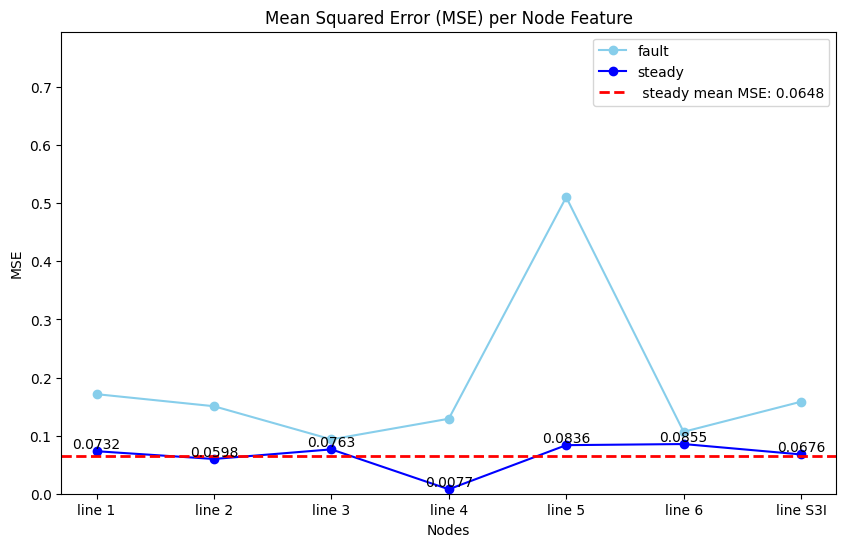

In [95]:
#Reading and Normalizing Features
csv_file_path = 'C:\\Users\\91950\\OneDrive\\Desktop\\fault_data.csv'
columns_to_read = [4, 7, 13, 10, 19, 16, 22]
features = pd.read_csv(csv_file_path, usecols=columns_to_read)
features = features[0:26600]

scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)
features1 = torch.tensor(features_normalized, dtype=torch.float)  # Use your actual features

x_test = features1
x_test = torch.tensor(x_test, dtype=torch.float)
edge_index = positive_edge_index

#features_tensor = features1
#dataset = GraphDataset(features_tensor)
#dataloader = DataLoader(dataset, batch_size=1000, shuffle=True)
#calculating recons errors with steady state data 
import torch
import torch.nn.functional as F

# Assuming model is your VGAE model and data is your Data object containing features
model.eval()
with torch.no_grad():
    recon_features, _, _ = model(x_test, edge_index)

# Compute MSE for each node feature
mse_per_feature = F.mse_loss(recon_features, x_test, reduction='none')
mse_per_node = torch.mean(mse_per_feature, dim=0)
print(f'Mean Squared Error (MSE) per node feature:')
for i, mse in enumerate(mse_per_node, start=1):
    print(f'Node {i}: {mse.item()}')
    

#plotting
import matplotlib.pyplot as plt
import numpy as np

# MSE values for each node
#mse_values = [0.10052483528852463, 0.08730024099349976, 0.054440926760435104, 
 #          0.1400376558303833, 0.2684721052646637, 0.10724300146102905,0.07387945801019669]
mse_values = mse_per_node
steady_values = [0.07315168529748917,0.059811048209667206,0.07632388174533844,0.00765578355640173,0.08357910066843033,0.08549486100673676,0.06761068105697632]


# Node labels
nodes = ['line 1', 'line 2', 'line 3', 'line 4', 'line 5', 'line 6', 'line S3I']

# Calculate the mean of the MSE values
mean_mse = np.mean(steady_values)

# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(nodes, mse_values, marker='o', color='skyblue', label='fault')
plt.plot(nodes, steady_values, marker='o', color='blue', label='steady')

# Add value labels on the points
for i, mse in enumerate(steady_values):
    plt.text(nodes[i], mse, round(mse, 4), ha='center', va='bottom')

# Add a horizontal line for the mean MSE
plt.axhline(mean_mse, color='red', linewidth=2, linestyle='--', label=f' steady mean MSE: {mean_mse:.4f}')

plt.xlabel('Nodes')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE) per Node Feature')
plt.ylim(0, max(steady_values) * 9.3)  # Add some padding to the y-axis
plt.legend()

# Display the plot
plt.show()


In [ ]:
"""#calculating recons errors with steady state data 
import torch
import torch.nn.functional as F

# Assuming model is your VGAE model and data is your Data object containing features
model.eval()
with torch.no_grad():
    recon_features, _, _ = model(x_test, edge_index)

# Compute MSE for each node feature
mse_per_feature = F.mse_loss(recon_features, x_test, reduction='none')
mse_per_node = torch.mean(mse_per_feature, dim=0)
print(f'Mean Squared Error (MSE) per node feature:')
for i, mse in enumerate(mse_per_node, start=1):
    print(f'Node {i}: {mse.item()}')"""

0-4000: node 3
4000-12000: node 4
12008-13340: node 5
13342-14600: node 1
14676-16000: node 5
16010-22600: node 2
22680- 26680: node 3

In [101]:
#custom testing function
import torch
import torch.nn.functional as F

# Assuming your model and data (x_test, edge_index) are already defined
#Reading and Normalizing Features
csv_file_path = 'C:\\Users\\91950\\OneDrive\\Desktop\\fault_data.csv'
columns_to_read = [4, 7, 13, 10, 19, 16, 22]
features = pd.read_csv(csv_file_path, usecols=columns_to_read)
features = features[16000:22600]

scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)
features1 = torch.tensor(features_normalized, dtype=torch.float)  # Use your actual features

x_test = features1
x_test = torch.tensor(x_test, dtype=torch.float)
edge_index = positive_edge_index

# Initialize a tensor to count the frequency of max MSE occurrences for each node

num_nodes = x_test.size(1)
max_mse_counts = torch.zeros(num_nodes, dtype=torch.int32)

# Set the batch size
batch_size = 100

# Define start and end indices for the test range
feature_start_idx = 0
feature_end_idx = x_test.size(0)

# Iterate over the test range in batches
for i in range(feature_start_idx, feature_end_idx, batch_size):
    # Get the current batch
    batch_end_idx = min(i + batch_size, feature_end_idx)
    batch_x_test = x_test[i:batch_end_idx]

    # Perform forward pass to reconstruct features for the batch
    model.eval()
    with torch.no_grad():
        recon_features, _, _ = model(batch_x_test, edge_index)

    # Compute MSE for each node feature in the batch
    mse_per_feature = F.mse_loss(recon_features, batch_x_test, reduction='none')
    mse_per_node = torch.mean(mse_per_feature, dim=0)  # Averaging over features

    # Find the index (node) with the maximum MSE in this batch
    max_mse_node = torch.argmax(mse_per_node).item()

    # Increment the count for the node with max MSE
    max_mse_counts[max_mse_node] += 1

# Find the node with the highest frequency of max MSE
most_frequent_max_mse_node = torch.argmax(max_mse_counts).item()+1

# Print the node number with the highest frequency
print(f'Node with the highest frequency of max MSE: Node {most_frequent_max_mse_node}')
print(f'Frequency count for each node: {max_mse_counts}')


C:\Users\91950\AppData\Local\Temp\ipykernel_2160\1424232460.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test = torch.tensor(x_test, dtype=torch.float)


Node with the highest frequency of max MSE: Node 3
Frequency count for each node: tensor([ 0,  0, 66,  0,  0,  0,  0], dtype=torch.int32)


In [ ]:
#weighted mse
dist_matrix = [[0,1,2,1,2,2,2],
               [1,0,1,1,1,2,2],
               [2,1,0,2,0,2,0],
               [1,1,2,0,2,2,1],
               [2,1,0,2,0,1,2],
               [2,2,2,2,1,0,1],
               [2,2,0,1,2,1,0]]

1 find node with max mse 
find distance of every other node from that node 
then inverse the distances and multiply to the mse 
find sum of distance of all other nodes from that node then take average and ivnerse it then multiple it with mse of the reference node 

In [ ]:

x_test.size()[1]

In [ ]:
#find max, will be used to find the line in which maximum error is occuring for the given batch 
def max_freq (array = []):
    for i in range (array.shape[0]):
        max_index = 0
        max_element = array[0]
        if(array[i]> max_element):
            max_element = array[i]
            max_index = i        
    return max_index+1
           


In [ ]:
print(max_freq(mse_per_node))

In [ ]:
#custom testing function 
feature_start_idx = 0
feature_end_idx = 4000
test_batch_size = 100
array = torch.tensor([0,0,0,0,0,0,0])
# array will contain count of each fault line at which fault occurs
# ith index will contain frequency of occurence of (i+1)th line fault 

for i in range (int((feature_end_idx-feature_start_idx)/test_batch_size)): 
    # Compute MSE for each node feature
    x_test = features1[feature_start_idx:feature_start_idx+test_batch_size]
    model.eval()
    with torch.no_grad():
       recon_features, _, _ = model(x_test, edge_index)
    mse_per_feature = F.mse_loss(recon_features, x_test, reduction='none')
    mse_per_node = torch.mean(mse_per_feature, dim=0)
    max_error_line = max_freq(mse_per_node) #finding which line had maximum mse
    array[max_error_line-1] = array[max_error_line-1]+1  #updating the frequency of fault in that line 
    feature_start_idx = feature_start_idx + test_batch_size
    

#finding which line had maximum frequency of fault 
print(max_freq(array))    
print(array)
    
    


In [ ]:
array.size()

In [ ]:
mse_per_node.shape[0]

In [ ]:
print(features1)

In [ ]:
print(x_test.shape)

In [ ]:
"""import torch
import torch.nn.functional as F

# Assuming model is your VGAE model and data is your Data object containing features
model.eval()
with torch.no_grad():
    recon_features, _, _ = model(x_test, edge_index)

# Compute MSE for each node feature
mse_per_feature = F.mse_loss(recon_features, x_test, reduction='none')
mse_per_node = torch.mean(mse_per_feature, dim=0)
print(f'Mean Squared Error (MSE) per node feature:')
for i, mse in enumerate(mse_per_node, start=1):
    print(f'Node {i}: {mse.item()}')"""

0.06045403331518173
Node 2: 0.04978080838918686
Node 3: 0.06117333471775055
Node 4: 0.03375500440597534
Node 5: 0.06546468287706375
Node 6: 0.06247369199991226
Node 7: 0.05447768419981003

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# MSE values for each node
#mse_values = [0.10052483528852463, 0.08730024099349976, 0.054440926760435104, 
 #          0.1400376558303833, 0.2684721052646637, 0.10724300146102905,0.07387945801019669]
mse_values = mse_per_node
steady_values = [0.06045403331518173,0.04978080838918686,0.06117333471775055,0.03375500440597534,0.06546468287706375,0.06247369199991226,0.05447768419981003]

# Node labels
nodes = ['Node 1', 'Node 2', 'Node 3', 'Node 4', 'Node 5', 'Node 6', 'Node 7']

# Calculate the mean of the MSE values
mean_mse = np.mean(steady_values)

# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(nodes, mse_values, marker='o', color='skyblue', label='fault')
plt.plot(nodes, steady_values, marker='o', color='blue', label='steady')

# Add value labels on the points
for i, mse in enumerate(steady_values):
    plt.text(nodes[i], mse, round(mse, 4), ha='center', va='bottom')

# Add a horizontal line for the mean MSE
plt.axhline(mean_mse, color='red', linewidth=2, linestyle='--', label=f' steady mean MSE: {mean_mse:.4f}')

plt.xlabel('Nodes')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE) per Node Feature')
plt.ylim(0, max(steady_values) * 9.3)  # Add some padding to the y-axis
plt.legend()

# Display the plot
plt.show()
